In [1]:
import numpy as np
import pandas as pd

In [2]:
BASE_DIR = "../csv/univ3-data/"

In [3]:
FILENAME = "univ3-axseth-03"
FILEPATH = f"{BASE_DIR}raw/{FILENAME}.csv"

In [4]:
FILEPATH

'../csv/univ3-data/raw/univ3-axseth-03.csv'

In [5]:
DECIMALS_0 = 18
DECIMALS_1 = 18

In [6]:
df = pd.read_csv(FILEPATH, parse_dates=['evt_block_time'], dtype={'sqrtPriceX96': np.longdouble, 'tick': np.int, 'liquidity': np.longdouble})
df

,evt_block_time,sqrtPriceX96,tick,liquidity
0,2021-06-05 07:07:14+00:00,3.232738e+27,-63984,2.410305e+20
1,2021-06-05 07:12:02+00:00,3.243736e+27,-63916,2.410305e+20
2,2021-06-05 07:18:03+00:00,3.309280e+27,-63516,2.410305e+20
3,2021-06-05 07:19:32+00:00,3.338205e+27,-63342,2.410305e+20
4,2021-06-05 07:20:42+00:00,3.290320e+27,-63631,2.410305e+20
...,...,...,...,...
153007,2021-10-18 16:52:20+00:00,1.417611e+28,-34418,3.564697e+22
153008,2021-10-18 16:52:20+00:00,1.417668e+28,-34417,3.564697e+22
153009,2021-10-18 16:53:39+00:00,1.417621e+28,-34418,3.564697e+22
153010,2021-10-18 17:04:15+00:00,1.417693e+28,-34417,3.564697e+22


In [7]:
def get_quote(sqrt_price_x96: np.float, is_y_x: bool, amount_in: int) -> int:
    if is_y_x:
        return int(sqrt_price_x96)**2 * amount_in / (1 << 192)
    else:
        return (1 << 192) * amount_in / int(sqrt_price_x96)**2
    
def get_reserve(sqrt_price_x96: np.float, liquidity: np.float, is_x: bool) -> int:
    if is_x:
        return (int(liquidity) << 96) / int(sqrt_price_x96)
    else:
        return (int(liquidity) * int(sqrt_price_x96)) / (1 << 96)

In [8]:
p0s = df['sqrtPriceX96'].apply(lambda x: get_quote(x, True, 10**(DECIMALS_0)))
p1s = df['sqrtPriceX96'].apply(lambda x: get_quote(x, False, 10**(DECIMALS_1)))

In [9]:
# Store the prices in original df
df['y/x'] = p0s
df['x/y'] = p1s

In [10]:
df

,evt_block_time,sqrtPriceX96,tick,liquidity,y/x,x/y
0,2021-06-05 07:07:14+00:00,3.232738e+27,-63984,2.410305e+20,1.664876e+15,6.006454e+20
1,2021-06-05 07:12:02+00:00,3.243736e+27,-63916,2.410305e+20,1.676223e+15,5.965792e+20
2,2021-06-05 07:18:03+00:00,3.309280e+27,-63516,2.410305e+20,1.744648e+15,5.731814e+20
3,2021-06-05 07:19:32+00:00,3.338205e+27,-63342,2.410305e+20,1.775279e+15,5.632916e+20
4,2021-06-05 07:20:42+00:00,3.290320e+27,-63631,2.410305e+20,1.724714e+15,5.798062e+20
...,...,...,...,...,...,...
153007,2021-10-18 16:52:20+00:00,1.417611e+28,-34418,3.564697e+22,3.201511e+16,3.123525e+19
153008,2021-10-18 16:52:20+00:00,1.417668e+28,-34417,3.564697e+22,3.201768e+16,3.123274e+19
153009,2021-10-18 16:53:39+00:00,1.417621e+28,-34418,3.564697e+22,3.201558e+16,3.123479e+19
153010,2021-10-18 17:04:15+00:00,1.417693e+28,-34417,3.564697e+22,3.201880e+16,3.123165e+19


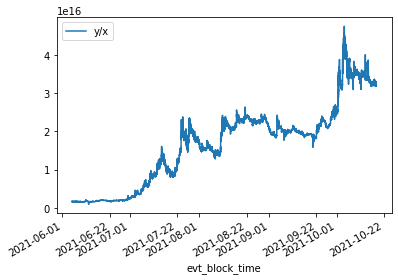

In [11]:
df.plot(x='evt_block_time', y='y/x')

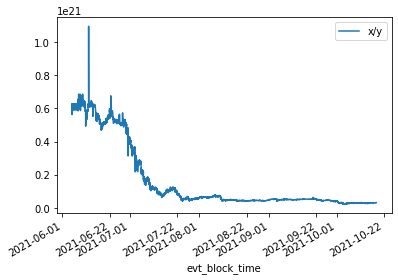

In [12]:
df.plot(x='evt_block_time', y='x/y')

In [13]:
# determine x, y reserves
xs = df.filter(items=['sqrtPriceX96', 'liquidity']).apply(lambda args: get_reserve(*args, is_x=True), axis=1)
ys = df.filter(items=['sqrtPriceX96', 'liquidity']).apply(lambda args: get_reserve(*args, is_x=False), axis=1)

In [14]:
df['x'] = xs
df['y'] = ys

In [15]:
df

,evt_block_time,sqrtPriceX96,tick,liquidity,y/x,x/y,x,y
0,2021-06-05 07:07:14+00:00,3.232738e+27,-63984,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18
1,2021-06-05 07:12:02+00:00,3.243736e+27,-63916,2.410305e+20,1.676223e+15,5.965792e+20,5.887164e+21,9.868202e+18
2,2021-06-05 07:18:03+00:00,3.309280e+27,-63516,2.410305e+20,1.744648e+15,5.731814e+20,5.770562e+21,1.006760e+19
3,2021-06-05 07:19:32+00:00,3.338205e+27,-63342,2.410305e+20,1.775279e+15,5.632916e+20,5.720562e+21,1.015560e+19
4,2021-06-05 07:20:42+00:00,3.290320e+27,-63631,2.410305e+20,1.724714e+15,5.798062e+20,5.803814e+21,1.000992e+19
...,...,...,...,...,...,...,...,...
153007,2021-10-18 16:52:20+00:00,1.417611e+28,-34418,3.564697e+22,3.201511e+16,3.123525e+19,1.992256e+23,6.378228e+21
153008,2021-10-18 16:52:20+00:00,1.417668e+28,-34417,3.564697e+22,3.201768e+16,3.123274e+19,1.992176e+23,6.378484e+21
153009,2021-10-18 16:53:39+00:00,1.417621e+28,-34418,3.564697e+22,3.201558e+16,3.123479e+19,1.992241e+23,6.378276e+21
153010,2021-10-18 17:04:15+00:00,1.417693e+28,-34417,3.564697e+22,3.201880e+16,3.123165e+19,1.992141e+23,6.378596e+21


In [16]:
df.set_index('evt_block_time', inplace=True)

In [17]:
df

,sqrtPriceX96,tick,liquidity,y/x,x/y,x,y
evt_block_time,,,,,,,
2021-06-05 07:07:14+00:00,3.232738e+27,-63984,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18
2021-06-05 07:12:02+00:00,3.243736e+27,-63916,2.410305e+20,1.676223e+15,5.965792e+20,5.887164e+21,9.868202e+18
2021-06-05 07:18:03+00:00,3.309280e+27,-63516,2.410305e+20,1.744648e+15,5.731814e+20,5.770562e+21,1.006760e+19
2021-06-05 07:19:32+00:00,3.338205e+27,-63342,2.410305e+20,1.775279e+15,5.632916e+20,5.720562e+21,1.015560e+19
2021-06-05 07:20:42+00:00,3.290320e+27,-63631,2.410305e+20,1.724714e+15,5.798062e+20,5.803814e+21,1.000992e+19
...,...,...,...,...,...,...,...
2021-10-18 16:52:20+00:00,1.417611e+28,-34418,3.564697e+22,3.201511e+16,3.123525e+19,1.992256e+23,6.378228e+21
2021-10-18 16:52:20+00:00,1.417668e+28,-34417,3.564697e+22,3.201768e+16,3.123274e+19,1.992176e+23,6.378484e+21
2021-10-18 16:53:39+00:00,1.417621e+28,-34418,3.564697e+22,3.201558e+16,3.123479e+19,1.992241e+23,6.378276e+21


In [18]:
df_resampled = df.resample('15s').mean()
df_resampled.ffill(inplace=True)
df_resampled

,sqrtPriceX96,tick,liquidity,y/x,x/y,x,y
evt_block_time,,,,,,,
2021-06-05 07:07:00+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18
2021-06-05 07:07:15+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18
2021-06-05 07:07:30+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18
2021-06-05 07:07:45+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18
2021-06-05 07:08:00+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18
...,...,...,...,...,...,...,...
2021-10-18 17:13:45+00:00,1.417693e+28,-34417.0,3.564697e+22,3.201880e+16,3.123165e+19,1.992141e+23,6.378596e+21
2021-10-18 17:14:00+00:00,1.417693e+28,-34417.0,3.564697e+22,3.201880e+16,3.123165e+19,1.992141e+23,6.378596e+21
2021-10-18 17:14:15+00:00,1.417693e+28,-34417.0,3.564697e+22,3.201880e+16,3.123165e+19,1.992141e+23,6.378596e+21


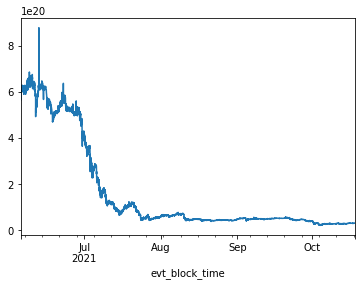

In [19]:
df_resampled['x/y'].plot()

In [20]:
def geo_avg(w, t):  
    return w[0]*np.prod(w/w[0])**(1/t) if len(w) != 0 else np.nan

In [21]:
WINDOW_10M = 40
WINDOW_1H = 240

In [22]:
df_resampled['x/y'].rolling(window=WINDOW_1H).apply(lambda w: geo_avg(w, WINDOW_1H), raw=True)

evt_block_time
2021-06-05 07:07:00+00:00             NaN
2021-06-05 07:07:15+00:00             NaN
2021-06-05 07:07:30+00:00             NaN
2021-06-05 07:07:45+00:00             NaN
2021-06-05 07:08:00+00:00             NaN
                                 ...     
2021-10-18 17:13:45+00:00    3.115078e+19
2021-10-18 17:14:00+00:00    3.115100e+19
2021-10-18 17:14:15+00:00    3.115122e+19
2021-10-18 17:14:30+00:00    3.115144e+19
2021-10-18 17:14:45+00:00    3.115166e+19
Freq: 15S, Name: x/y, Length: 780032, dtype: float64

In [23]:
# determine geometric twaps
p0s_twap10m = df_resampled['y/x'].rolling(window=WINDOW_10M).apply(lambda w: geo_avg(w, WINDOW_10M), raw=True)
p1s_twap10m = df_resampled['x/y'].rolling(window=WINDOW_10M).apply(lambda w: geo_avg(w, WINDOW_10M), raw=True)

p0s_twap1h = df_resampled['y/x'].rolling(window=WINDOW_1H).apply(lambda w: geo_avg(w, WINDOW_1H), raw=True)
p1s_twap1h = df_resampled['x/y'].rolling(window=WINDOW_1H).apply(lambda w: geo_avg(w, WINDOW_1H), raw=True)

In [24]:
p0s_twap10m

evt_block_time
2021-06-05 07:07:00+00:00             NaN
2021-06-05 07:07:15+00:00             NaN
2021-06-05 07:07:30+00:00             NaN
2021-06-05 07:07:45+00:00             NaN
2021-06-05 07:08:00+00:00             NaN
                                 ...     
2021-10-18 17:13:45+00:00    3.201872e+16
2021-10-18 17:14:00+00:00    3.201880e+16
2021-10-18 17:14:15+00:00    3.201880e+16
2021-10-18 17:14:30+00:00    3.201880e+16
2021-10-18 17:14:45+00:00    3.201880e+16
Freq: 15S, Name: y/x, Length: 780032, dtype: float64

In [25]:
p1s_twap10m

evt_block_time
2021-06-05 07:07:00+00:00             NaN
2021-06-05 07:07:15+00:00             NaN
2021-06-05 07:07:30+00:00             NaN
2021-06-05 07:07:45+00:00             NaN
2021-06-05 07:08:00+00:00             NaN
                                 ...     
2021-10-18 17:13:45+00:00    3.123173e+19
2021-10-18 17:14:00+00:00    3.123165e+19
2021-10-18 17:14:15+00:00    3.123165e+19
2021-10-18 17:14:30+00:00    3.123165e+19
2021-10-18 17:14:45+00:00    3.123165e+19
Freq: 15S, Name: x/y, Length: 780032, dtype: float64

In [26]:
p1s_twap1h

evt_block_time
2021-06-05 07:07:00+00:00             NaN
2021-06-05 07:07:15+00:00             NaN
2021-06-05 07:07:30+00:00             NaN
2021-06-05 07:07:45+00:00             NaN
2021-06-05 07:08:00+00:00             NaN
                                 ...     
2021-10-18 17:13:45+00:00    3.115078e+19
2021-10-18 17:14:00+00:00    3.115100e+19
2021-10-18 17:14:15+00:00    3.115122e+19
2021-10-18 17:14:30+00:00    3.115144e+19
2021-10-18 17:14:45+00:00    3.115166e+19
Freq: 15S, Name: x/y, Length: 780032, dtype: float64

In [27]:
df_resampled['y/x twap 10m'] = p0s_twap10m
df_resampled['y/x twap 1h'] = p0s_twap1h

df_resampled['x/y twap 10m'] = p1s_twap10m
df_resampled['x/y twap 1h'] = p1s_twap1h

In [28]:
df_resampled

,sqrtPriceX96,tick,liquidity,y/x,x/y,x,y,y/x twap 10m,y/x twap 1h,x/y twap 10m,x/y twap 1h
evt_block_time,,,,,,,,,,,
2021-06-05 07:07:00+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18,NaN,NaN,NaN,NaN
2021-06-05 07:07:15+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18,NaN,NaN,NaN,NaN
2021-06-05 07:07:30+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18,NaN,NaN,NaN,NaN
2021-06-05 07:07:45+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18,NaN,NaN,NaN,NaN
2021-06-05 07:08:00+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18 17:13:45+00:00,1.417693e+28,-34417.0,3.564697e+22,3.201880e+16,3.123165e+19,1.992141e+23,6.378596e+21,3.201872e+16,3.210193e+16,3.123173e+19,3.115078e+19
2021-10-18 17:14:00+00:00,1.417693e+28,-34417.0,3.564697e+22,3.201880e+16,3.123165e+19,1.992141e+23,6.378596e+21,3.201880e+16,3.210170e+16,3.123165e+19,3.115100e+19
2021-10-18 17:14:15+00:00,1.417693e+28,-34417.0,3.564697e+22,3.201880e+16,3.123165e+19,1.992141e+23,6.378596e+21,3.201880e+16,3.210147e+16,3.123165e+19,3.115122e+19


/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


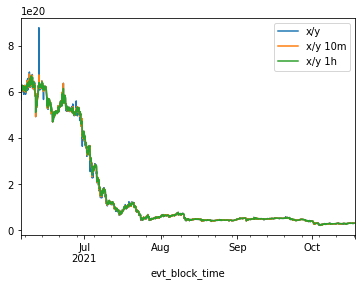

In [29]:
ax = df_resampled['x/y'].plot(label='x/y')
df_resampled['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

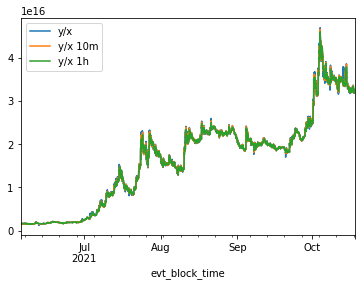

In [30]:
ax = df_resampled['y/x'].plot(label='y/x')
df_resampled['y/x twap 10m'].plot(ax=ax, label='y/x 10m')
df_resampled['y/x twap 1h'].plot(ax=ax, label='y/x 1h')
ax.legend()

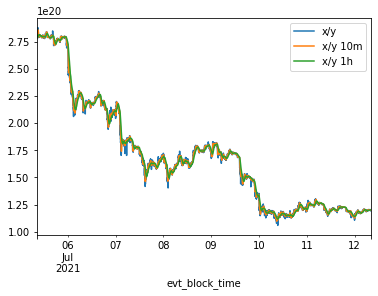

In [31]:
rng = (df_resampled.index > "2021-07-05 08:23:26+00:00") & (df_resampled.index < "2021-07-12 08:23:26+00:00")

ax = df_resampled[rng]['x/y'].plot(label='x/y')
df_resampled[rng]['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled[rng]['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

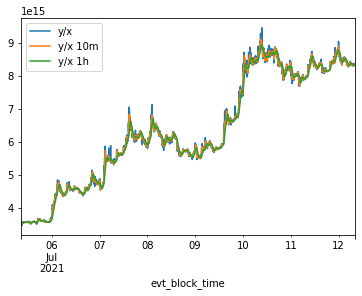

In [32]:
rng = (df_resampled.index > "2021-07-05 08:23:26+00:00") & (df_resampled.index < "2021-07-12 08:23:26+00:00")

ax = df_resampled[rng]['y/x'].plot(label='y/x')
df_resampled[rng]['y/x twap 10m'].plot(ax=ax, label='y/x 10m')
df_resampled[rng]['y/x twap 1h'].plot(ax=ax, label='y/x 1h')
ax.legend()

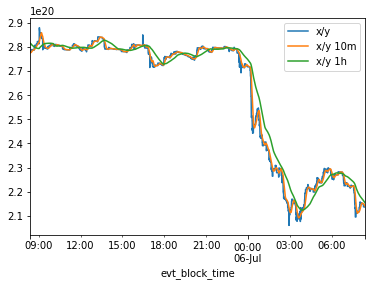

In [33]:
rng = (df_resampled.index > "2021-07-05 08:23:26+00:00") & (df_resampled.index < "2021-07-06 08:23:26+00:00")

ax = df_resampled[rng]['x/y'].plot(label='x/y')
df_resampled[rng]['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled[rng]['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

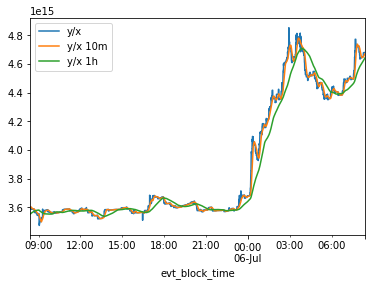

In [34]:
rng = (df_resampled.index > "2021-07-05 08:23:26+00:00") & (df_resampled.index < "2021-07-06 08:23:26+00:00")

ax = df_resampled[rng]['y/x'].plot(label='y/x')
df_resampled[rng]['y/x twap 10m'].plot(ax=ax, label='y/x 10m')
df_resampled[rng]['y/x twap 1h'].plot(ax=ax, label='y/x 1h')
ax.legend()

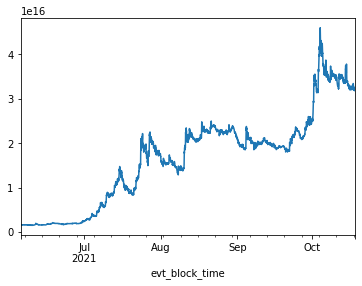

In [35]:
p0s_twap1h.plot()

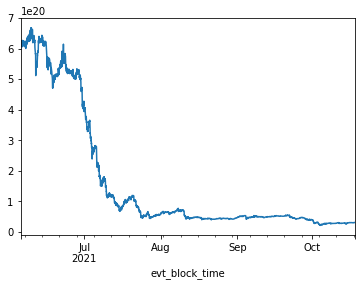

In [36]:
p1s_twap1h.plot()

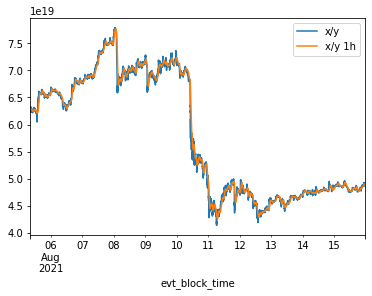

In [37]:
rng = (df_resampled.index > "2021-08-05 08:23:26+00:00") & (df_resampled.index < "2021-08-15 23:23:26+00:00")

ax = df_resampled[rng]['x/y'].plot(label='x/y')
df_resampled[rng]['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

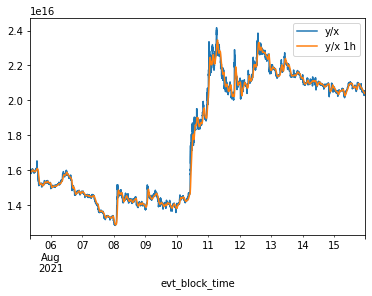

In [38]:
rng = (df_resampled.index > "2021-08-05 08:23:26+00:00") & (df_resampled.index < "2021-08-15 23:23:26+00:00")

ax = df_resampled[rng]['y/x'].plot(label='y/x')
df_resampled[rng]['y/x twap 1h'].plot(ax=ax, label='y/x 1h')
ax.legend()

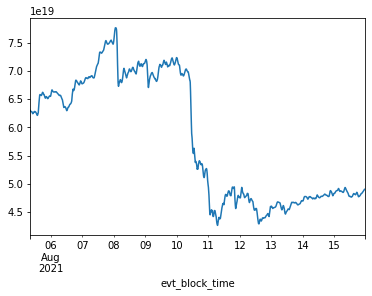

In [39]:
df_resampled[(df_resampled.index > "2021-08-05 08:23:26+00:00") & (df_resampled.index < "2021-08-15 23:23:26+00:00")]['x/y twap 1h'].plot(label='x/y 1h')

In [40]:
# determine time-averaged liquidity
xs_twa10m = df_resampled['x'].rolling(window=WINDOW_10M).apply(lambda w: geo_avg(w, WINDOW_10M), raw=True)
ys_twa10m = df_resampled['y'].rolling(window=WINDOW_10M).apply(lambda w: geo_avg(w, WINDOW_10M), raw=True)

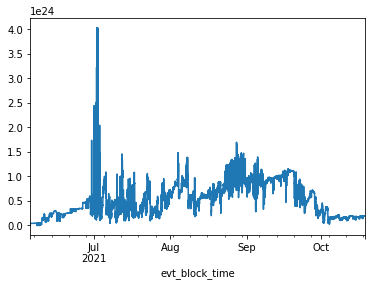

In [41]:
xs_twa10m.plot()

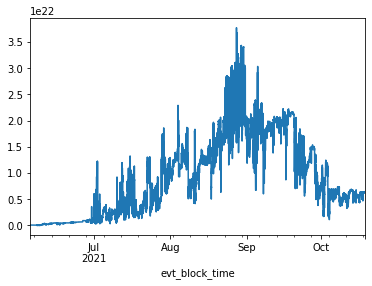

In [42]:
ys_twa10m.plot()

In [43]:
df_resampled['x 10m avg'] = xs_twa10m
df_resampled['y 10m avg'] = ys_twa10m

In [44]:
df_resampled

,sqrtPriceX96,tick,liquidity,y/x,x/y,x,y,y/x twap 10m,y/x twap 1h,x/y twap 10m,x/y twap 1h,x 10m avg,y 10m avg
evt_block_time,,,,,,,,,,,,,
2021-06-05 07:07:00+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-05 07:07:15+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-05 07:07:30+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-05 07:07:45+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-05 07:08:00+00:00,3.232738e+27,-63984.0,2.410305e+20,1.664876e+15,6.006454e+20,5.907193e+21,9.834742e+18,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18 17:13:45+00:00,1.417693e+28,-34417.0,3.564697e+22,3.201880e+16,3.123165e+19,1.992141e+23,6.378596e+21,3.201872e+16,3.210193e+16,3.123173e+19,3.115078e+19,1.992143e+23,6.378588e+21
2021-10-18 17:14:00+00:00,1.417693e+28,-34417.0,3.564697e+22,3.201880e+16,3.123165e+19,1.992141e+23,6.378596e+21,3.201880e+16,3.210170e+16,3.123165e+19,3.115100e+19,1.992141e+23,6.378596e+21
2021-10-18 17:14:15+00:00,1.417693e+28,-34417.0,3.564697e+22,3.201880e+16,3.123165e+19,1.992141e+23,6.378596e+21,3.201880e+16,3.210147e+16,3.123165e+19,3.115122e+19,1.992141e+23,6.378596e+21


In [45]:
df_resampled_sqrd = df_resampled.resample('60s').mean()

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


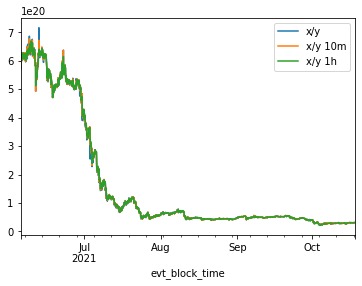

In [46]:
ax = df_resampled_sqrd['x/y'].plot(label='x/y')
df_resampled_sqrd['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled_sqrd['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

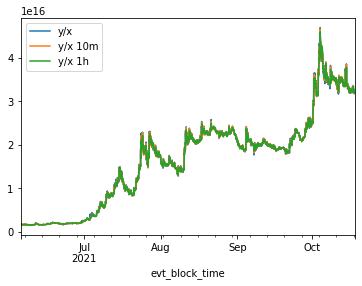

In [47]:
ax = df_resampled_sqrd['y/x'].plot(label='y/x')
df_resampled_sqrd['y/x twap 10m'].plot(ax=ax, label='y/x 10m')
df_resampled_sqrd['y/x twap 1h'].plot(ax=ax, label='y/x 1h')
ax.legend()

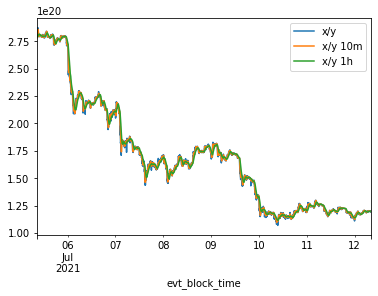

In [48]:
rng = (df_resampled_sqrd.index > "2021-07-05 08:23:26+00:00") & (df_resampled_sqrd.index < "2021-07-12 08:23:26+00:00")

ax = df_resampled_sqrd[rng]['x/y'].plot(label='x/y')
df_resampled_sqrd[rng]['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled_sqrd[rng]['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

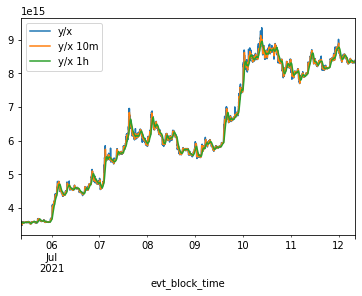

In [49]:
rng = (df_resampled_sqrd.index > "2021-07-05 08:23:26+00:00") & (df_resampled_sqrd.index < "2021-07-12 08:23:26+00:00")

ax = df_resampled_sqrd[rng]['y/x'].plot(label='y/x')
df_resampled_sqrd[rng]['y/x twap 10m'].plot(ax=ax, label='y/x 10m')
df_resampled_sqrd[rng]['y/x twap 1h'].plot(ax=ax, label='y/x 1h')
ax.legend()

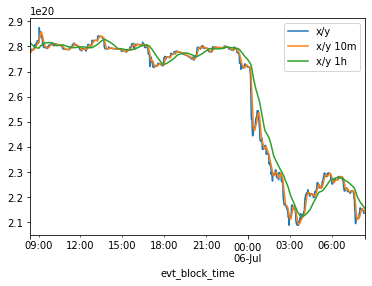

In [50]:
rng = (df_resampled_sqrd.index > "2021-07-05 08:23:26+00:00") & (df_resampled_sqrd.index < "2021-07-06 08:23:26+00:00")

ax = df_resampled_sqrd[rng]['x/y'].plot(label='x/y')
df_resampled_sqrd[rng]['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled_sqrd[rng]['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

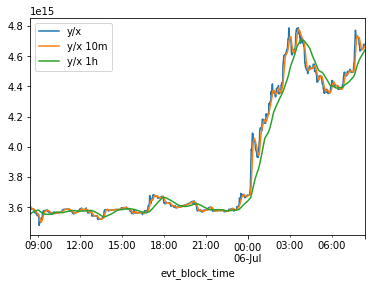

In [51]:
rng = (df_resampled_sqrd.index > "2021-07-05 08:23:26+00:00") & (df_resampled_sqrd.index < "2021-07-06 08:23:26+00:00")

ax = df_resampled_sqrd[rng]['y/x'].plot(label='y/x')
df_resampled_sqrd[rng]['y/x twap 10m'].plot(ax=ax, label='y/x 10m')
df_resampled_sqrd[rng]['y/x twap 1h'].plot(ax=ax, label='y/x 1h')
ax.legend()

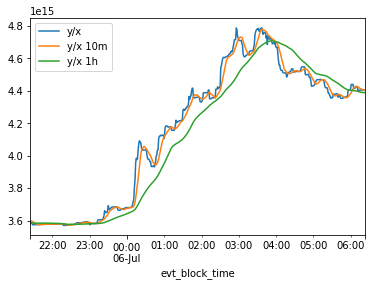

In [52]:
rng = (df_resampled_sqrd.index > "2021-07-05 21:23:26+00:00") & (df_resampled_sqrd.index < "2021-07-06 06:23:26+00:00")

ax = df_resampled_sqrd[rng]['y/x'].plot(label='y/x')
df_resampled_sqrd[rng]['y/x twap 10m'].plot(ax=ax, label='y/x 10m')
df_resampled_sqrd[rng]['y/x twap 1h'].plot(ax=ax, label='y/x 1h')
ax.legend()

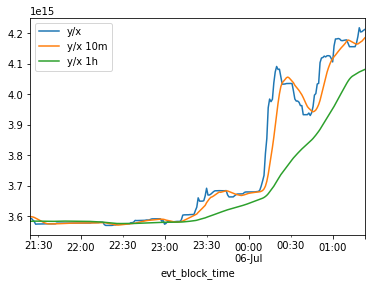

In [53]:
rng = (df_resampled_sqrd.index > "2021-07-05 21:23:26+00:00") & (df_resampled_sqrd.index < "2021-07-06 01:23:26+00:00")

ax = df_resampled_sqrd[rng]['y/x'].plot(label='y/x')
df_resampled_sqrd[rng]['y/x twap 10m'].plot(ax=ax, label='y/x 10m')
df_resampled_sqrd[rng]['y/x twap 1h'].plot(ax=ax, label='y/x 1h')
ax.legend()

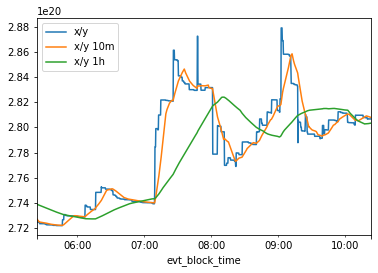

In [54]:
rng = (df_resampled.index > "2021-07-05 05:23:26+00:00") & (df_resampled.index < "2021-07-05 10:23:26+00:00")

ax = df_resampled[rng]['x/y'].plot(label='x/y')
df_resampled[rng]['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled[rng]['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

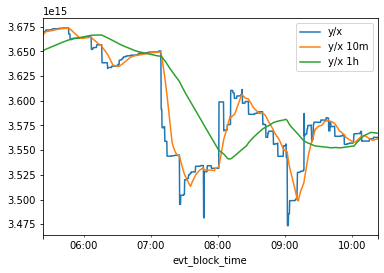

In [55]:
rng = (df_resampled.index > "2021-07-05 05:23:26+00:00") & (df_resampled.index < "2021-07-05 10:23:26+00:00")

ax = df_resampled[rng]['y/x'].plot(label='y/x')
df_resampled[rng]['y/x twap 10m'].plot(ax=ax, label='y/x 10m')
df_resampled[rng]['y/x twap 1h'].plot(ax=ax, label='y/x 1h')
ax.legend()

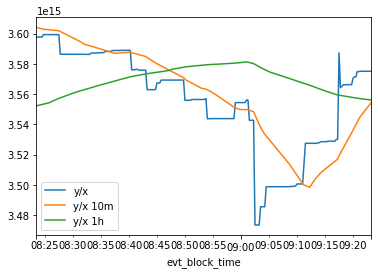

In [56]:
rng = (df_resampled.index > "2021-07-05 08:23:26+00:00") & (df_resampled.index < "2021-07-05 09:23:26+00:00")

ax = df_resampled[rng]['y/x'].plot(label='y/x')
df_resampled[rng]['y/x twap 10m'].plot(ax=ax, label='y/x 10m')
df_resampled[rng]['y/x twap 1h'].plot(ax=ax, label='y/x 1h')
ax.legend()

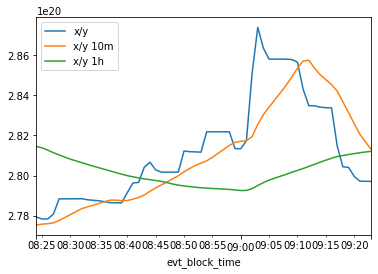

In [57]:
rng = (df_resampled_sqrd.index > "2021-07-05 08:23:26+00:00") & (df_resampled_sqrd.index < "2021-07-05 09:23:26+00:00")

ax = df_resampled_sqrd[rng]['x/y'].plot(label='x/y')
df_resampled_sqrd[rng]['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled_sqrd[rng]['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

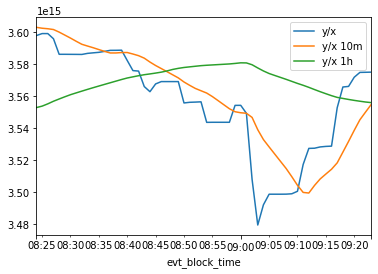

In [58]:
rng = (df_resampled_sqrd.index > "2021-07-05 08:23:26+00:00") & (df_resampled_sqrd.index < "2021-07-05 09:23:26+00:00")

ax = df_resampled_sqrd[rng]['y/x'].plot(label='y/x')
df_resampled_sqrd[rng]['y/x twap 10m'].plot(ax=ax, label='y/x 10m')
df_resampled_sqrd[rng]['y/x twap 1h'].plot(ax=ax, label='y/x 1h')
ax.legend()